# Optimizer

In [1]:
import numpy as np

- 함수 및 도함수 정의

In [2]:
# f(x,y) = x*x + y*y + xy - 4x - 8y
def func(params):
    x, y = params
    return x*x + y*y + x*y - 4.*x - 8.*y

# Df(x,y) = (2x + y - 4, 2y + x - 8)
def deriv_f(params):
    x, y = params
    return np.array((np.round(2*x + y - 4., 4), np.round(2*y + x - 8., 4)))

- SGD(Stochastic Gradient Descent): 확률적 경사 하강법

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for i in range(params.shape[0]):
            params[i] -= self.lr * grads[i]

In [4]:
sgd = SGD(0.5)
params = np.array((0,0), dtype=np.float32)
grads = deriv_f(params)
print(f'초기값: params={params}, grads={grads}, func={func(params):.4f}')
for i in range(10):
    sgd.update(params, grads)
    print(f'{i+1}회 시행: params={params}, grads={grads}, func={func(params):.4f}')
    grads = deriv_f(params)

초기값: params=[0. 0.], grads=[-4. -8.], func=0.0000
1회 시행: params=[2. 4.], grads=[-4. -8.], func=-12.0000
2회 시행: params=[0. 3.], grads=[4. 2.], func=-15.0000
3회 시행: params=[0.5 4. ], grads=[-1. -2.], func=-15.7500
4회 시행: params=[0.   3.75], grads=[1.  0.5], func=-15.9375
5회 시행: params=[0.125 4.   ], grads=[-0.25 -0.5 ], func=-15.9844
6회 시행: params=[0.     3.9375], grads=[0.25  0.125], func=-15.9961
7회 시행: params=[0.03125 4.     ], grads=[-0.0625 -0.125 ], func=-15.9990
8회 시행: params=[0.     3.9844], grads=[0.0625 0.0312], func=-15.9998
9회 시행: params=[0.0078 4.    ], grads=[-0.0156 -0.0312], func=-15.9999
10회 시행: params=[-2.1159649e-10  3.9960999e+00], grads=[0.0156 0.0078], func=-16.0000


- Momentum
    - Gradient Descent에 현재의 관성을 추가

In [5]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = np.zeros_like(params)
        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]

In [6]:
momentum = Momentum(lr=0.5, momentum=0.5)
params = np.zeros(2, dtype=np.float32)
grads = deriv_f(params)
print(f'초기값: params={params}, grads={grads}, func={func(params):.4f}')
for i in range(10):
    momentum.update(params, grads)
    print(f'{i+1}회 시행: params={params}, grads={grads}, v={momentum.v}, func={func(params):.4f}')
    grads = deriv_f(params)

초기값: params=[0. 0.], grads=[-4. -8.], func=0.0000
1회 시행: params=[2. 4.], grads=[-4. -8.], v=[2. 4.], func=-12.0000
2회 시행: params=[1. 5.], grads=[4. 2.], v=[-1.  1.], func=-13.0000
3회 시행: params=[-1.  4.], grads=[3. 3.], v=[-2. -1.], func=-15.0000
4회 시행: params=[-1.  4.], grads=[-2. -1.], v=[0. 0.], func=-15.0000
5회 시행: params=[0.  4.5], grads=[-2. -1.], v=[1.  0.5], func=-15.7500
6회 시행: params=[0.25 4.25], grads=[0.5 1. ], v=[ 0.25 -0.25], func=-15.8125
7회 시행: params=[0.   3.75], grads=[0.75 0.75], v=[-0.25 -0.5 ], func=-15.9375
8회 시행: params=[0.   3.75], grads=[-0.25 -0.5 ], v=[0. 0.], func=-15.9375
9회 시행: params=[0.125 4.   ], grads=[-0.25 -0.5 ], v=[0.125 0.25 ], func=-15.9844
10회 시행: params=[0.0625 4.0625], grads=[0.25  0.125], v=[-0.0625  0.0625], func=-15.9883


- NAG(Nesterov Accelerated Gradient)
    - 현재 위치에서의 관성과 관성방향으로 움직인 후 위치에서의 gradient 반대방향을 합침

In [7]:
class NAG:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self, params, grads):
        if self.v is None:
            self.v = np.zeros_like(params)
        for i in range(len(params)):
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]

In [8]:
nag = NAG(lr=0.2, momentum=0.8)
params = np.zeros(2, dtype=np.float32)
grads = deriv_f(params)
print(f'초기값: params={params}, grads={grads}, func={func(params):.4f}')
for i in range(10):
    nag.update(params, grads)
    print(f'{i+1}회 시행: params={params}, grads={grads}, v={momentum.v}, func={func(params):.4f}')
    grads = deriv_f(params)

초기값: params=[0. 0.], grads=[-4. -8.], func=0.0000
1회 시행: params=[1.44 2.88], grads=[-4. -8.], v=[-0.0625  0.0625], func=-14.2848
2회 시행: params=[1.3184 4.192 ], grads=[ 1.76 -0.8 ], v=[-0.0625  0.0625], func=-13.9718
3회 시행: params=[0.484352  4.5007358], grads=[2.8288 1.7024], v=[-0.0625  0.0625], func=-15.2721
4회 시행: params=[-0.2592624  4.485221 ], grads=[1.4694 1.4858], v=[-0.0625  0.0625], func=-15.8231
5회 시행: params=[-0.6070619  4.4545045], grads=[-0.0333  0.7112], v=[-0.0625  0.0625], func=-15.7008
6회 시행: params=[-0.61717355  4.4350395 ], grads=[-0.7596  0.3019], v=[-0.0625  0.0625], func=-15.6983
7회 시행: params=[-0.4590508  4.3767276], grads=[-0.7993  0.2529], v=[-0.0625  0.0625], func=-15.8203
8회 시행: params=[-0.26553664  4.264558  ], grads=[-0.5414  0.2944], v=[-0.0625  0.0625], func=-15.9298
9회 시행: params=[-0.10140929  4.1270304 ], grads=[-0.2665  0.2636], v=[-0.0625  0.0625], func=-15.9865
10회 시행: params=[0.01454058 4.004212  ], grads=[-0.0758  0.1527], v=[-0.0625  0.0625], func=

- AdaGrad
    - 일정한 learning rate를 사용하지 않고 변수마다 그리고 스텝마다 learning rate가 바뀜

In [9]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = np.zeros_like(params)
        for i in range(len(params)):
            self.h[i] = round(self.h[i] + grads[i] * grads[i], 4)
            params[i] = round(params[i] - self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7), 4)

In [10]:
adg = AdaGrad(lr=10)
params = np.zeros(2, dtype=np.float32)
grads = deriv_f(params)
print(f'초기값: params={params}, grads={grads}, func={func(params):.4f}')
for i in range(10):
    adg.update(params, grads)
    print(f'{i+1}회 시행: params={params}, grads={grads}, h={adg.h}, func={func(params):.4f}')
    grads = deriv_f(params)

초기값: params=[0. 0.], grads=[-4. -8.], func=0.0000
1회 시행: params=[10. 10.], grads=[-4. -8.], h=[16. 64.], func=180.0000
2회 시행: params=[0.1163 0.6021], grads=[26. 22.], h=[692. 548.], func=-4.8359
3회 시행: params=[1.3109 3.3459], grads=[-3.1653 -6.6795], h=[702.0191 592.6157], func=-14.7112
4회 시행: params=[0.5703 3.3448], grads=[1.9677 0.0027], h=[705.8909 592.6157], func=-15.6191
5회 시행: params=[0.3876 3.6487], grads=[ 0.4854 -0.7401], h=[706.1265 593.1635], func=-15.8625
6회 시행: params=[0.2281 3.778 ], grads=[ 0.4239 -0.315 ], h=[706.3062 593.2627], func=-15.9493
7회 시행: params=[0.14   3.8666], grads=[ 0.2342 -0.2159], h=[706.3611 593.3093], func=-15.9813
8회 시행: params=[0.0848 3.9187], grads=[ 0.1466 -0.1268], h=[706.3826 593.3254], func=-15.9931
9회 시행: params=[0.0516 3.9506], grads=[ 0.0883 -0.0778], h=[706.3904 593.3314], func=-15.9974
10회 시행: params=[0.0314 3.97  ], grads=[ 0.0538 -0.0472], h=[706.3933 593.3336], func=-15.9991


- RMSProp
    - AdaGrad는 스텝이 많이 진행되면 h 값이 너무 커져서 학습률이 너무 작아져 학습이 거의 되지 않음
    - 이를 보완하기 위해 이전 누적치와 현재 그래디언트의 좌표별 제곱의 가중치 평균을 반영함

In [11]:
class RMSProp:
    def __init__(self, lr=0.01, gamma=0.75):    # gamma: forgetting factor(decay rate)
        self.lr = lr
        self.gamma = gamma      # gamma가 클수록 과거가 중요하고, 작을수록 현재(gradient)가 중요
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = np.zeros_like(params)
        for i in range(len(params)):
            self.h[i] = round(self.gamma * self.h[i] + (1 - self.gamma) * grads[i] * grads[i], 4)
            params[i] = round(params[i] - self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7), 4)

In [12]:
rmsp = RMSProp(lr=0.9, gamma=0.75)
params = np.zeros(2, dtype=np.float32)
grads = deriv_f(params)
print(f'초기값: params={params}, grads={grads}, func={func(params):.4f}')
for i in range(10):
    rmsp.update(params, grads)
    print(f'{i+1}회 시행: params={params}, grads={grads}, h={rmsp.h}, func={func(params):.4f}')
    grads = deriv_f(params)

초기값: params=[0. 0.], grads=[-4. -8.], func=0.0000
1회 시행: params=[1.8 1.8], grads=[-4. -8.], h=[ 4. 16.], func=-11.8800
2회 시행: params=[1.1255 2.4324], grads=[ 1.4 -2.6], h=[ 3.49 13.69], func=-14.0402
3회 시행: params=[0.7535 2.971 ], grads=[ 0.6834 -2.0097], h=[ 2.7343 11.2772], func=-15.1487
4회 시행: params=[0.4572 3.3649], grads=[ 0.478  -1.3045], h=[2.1078 8.8833], func=-15.6780
5회 시행: params=[0.2585 3.6449], grads=[ 0.2793 -0.813 ], h=[1.6004 6.8277], func=-15.8989
6회 시행: params=[0.1259 3.8237], grads=[ 0.1619 -0.4517], h=[1.2069 5.1718], func=-15.9753
7회 시행: params=[0.0545 3.9271], grads=[ 0.0755 -0.2267], h=[0.9066 3.8917], func=-15.9957
8회 시행: params=[0.0151 3.9752], grads=[ 0.0361 -0.0913], h=[0.6803 2.9209], func=-15.9995
9회 시행: params=[0.0083 3.9962], grads=[ 0.0054 -0.0345], h=[0.5102 2.191 ], func=-15.9999
10회 시행: params=[-0.0103  3.9957], grads=[0.0128 0.0007], h=[0.3827 1.6433], func=-15.9998


- Adam
    - Momentum과 RMSProp 두가지 방식을 혼합

In [13]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr, self.beta1, self.beta2 = lr, beta1, beta2
        self.iter, self.m, self.v = 0, None, None
    def update(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        self.iter += 1
        lr_t = self.lr * np.sqrt(1. - self.beta2**self.iter) / (1. - self.beta1**self.iter)
        
        for i in range(len(params)):
            self.m[i] = round(self.beta1 * self.m[i] + (1. - self.beta1) * grads[i], 4)
            # self.m[i] += (1. - self.beta1) * (grads[i] - self.m[i])
            self.v[i] = round(self.beta2 * self.v[i] + (1. - self.beta2) * grads[i]**2, 4)
            # self.v[i] += (1. - self.beta2) * (grads[i]**2 - self.v[i])
            params[i] = round(params[i] - lr_t * self.m[i] / (np.sqrt(self.v[i] + 1e-7)), 4)

In [14]:
adam = Adam(lr=0.9)
params = np.zeros(2, dtype=np.float32)
grads = deriv_f(params)
print(f'초기값: params={params}, grads={grads}, func={func(params):.4f}')
for i in range(10):
    adam.update(params, grads)
    print(f'{i+1}회 시행: params={params}, grads={grads}, m={adam.m}, v={adam.v}, func={func(params):.4f}')
    grads = deriv_f(params)

초기값: params=[0. 0.], grads=[-4. -8.], func=0.0000
1회 시행: params=[0.9 0.9], grads=[-4. -8.], m=[-0.4 -0.8], v=[0.016 0.064], func=-8.3700
2회 시행: params=[1.68   1.7728], grads=[-1.3 -5.3], m=[-0.49 -1.25], v=[0.0177 0.092 ], func=-11.9589
3회 시행: params=[2.1122 2.5807], grads=[ 1.1328 -2.7744], m=[-0.3277 -1.4024], v=[0.019  0.0996], func=-12.5220
4회 시행: params=[2.1267 3.2788], grads=[ 2.8051 -0.7264], m=[-0.0144 -1.3348], v=[0.0268 0.1   ], func=-12.4908
5회 시행: params=[1.8599 3.8339], grads=[3.5322 0.6843], m=[ 0.3403 -1.1329], v=[0.0392 0.1004], func=-12.8221
6회 시행: params=[1.4279 4.236 ], grads=[3.5537 1.5277], m=[ 0.6616 -0.8668], v=[0.0518 0.1026], func=-13.5684
7회 시행: params=[0.9013 4.4971], grads=[3.0918 1.8999], m=[ 0.9046 -0.5901], v=[0.0613 0.1061], func=-14.4925
8회 시행: params=[0.33   4.6426], grads=[2.2997 1.8955], m=[ 1.0441 -0.3415], v=[0.0665 0.1096], func=-15.2661
9회 시행: params=[-0.2404  4.7032], grads=[1.3026 1.6152], m=[ 1.07   -0.1458], v=[0.0681 0.1121], func=-15.6168
1

### 시각화

In [15]:
import matplotlib.pyplot as plt
from collections import OrderedDict

In [16]:
def f(x, y):
    #x, y = params[0], params[1]
    return x*x / 20.0 + y*y

def df(x, y):
    #x, y = params[0], params[1]
    return np.array((x / 10.0, 2*y))

In [17]:
optimizers = OrderedDict()
optimizers['SGD'] = SGD(lr=0.95)
optimizers['Momentum'] = Momentum(lr=0.1)
optimizers['AdaGrad'] = AdaGrad(lr=1.5)
optimizers['Adam'] = Adam(lr=0.3)

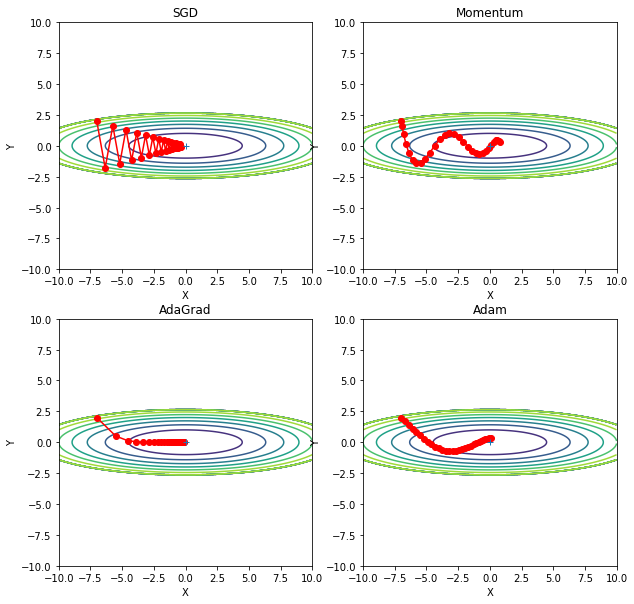

In [18]:
idx = 1
plt.figure(figsize=(10,10))
for key in optimizers:
    optimizer = optimizers[key]
    x_history, y_history = [], []
    params = np.array((-7, 2), dtype=np.float32)
    for i in range(30):
        x_history.append(params[0])
        y_history.append(params[1])
        grads = df(params[0], params[1])
        optimizer.update(params, grads)
        
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'ro-')
    plt.contour(X, Y, Z)
    plt.xlim(-10, 10), plt.ylim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key), plt.xlabel('X'), plt.ylabel('Y')
    
plt.show()